# Final Code

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Adding some noise

In [2]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [3]:
model2 = Sequential() #try with different hyperparameters
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2), padding='same'))    # 4,4,8
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.evaluate(x_test,x_test)

model2.fit(x_train, x_train, epochs=40, batch_size=256, shuffle=True,
         validation_data=(x_test,x_test))

model2.summary()

313/313 [==============================] - 9s 28ms/step - loss: 0.1140
Epoch 1/40
235/235 [==============================] - 109s 452ms/step - loss: 0.0501 - val_loss: 0.0335
Epoch 2/40
235/235 [==============================] - 106s 450ms/step - loss: 0.0292 - val_loss: 0.0257
Epoch 3/40
235/235 [==============================] - 108s 458ms/step - loss: 0.0242 - val_loss: 0.0226
Epoch 4/40
235/235 [==============================] - 108s 461ms/step - loss: 0.0218 - val_loss: 0.0207
Epoch 5/40
235/235 [==============================] - 123s 525ms/step - loss: 0.0204 - val_loss: 0.0193
Epoch 6/40
235/235 [==============================] - 126s 535ms/step - loss: 0.0192 - val_loss: 0.0186
Epoch 7/40
235/235 [==============================] - 127s 540ms/step - loss: 0.0185 - val_loss: 0.0184
Epoch 8/40
235/235 [==============================] - 123s 518ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 9/40
235/235 [==============================] - 110s 468ms/step - loss: 0.0174 - val_loss: 

In [4]:
from keras.models import Model
encoder=Model(inputs=model2.get_layer('conv2d').input,outputs=model2.get_layer('conv2d_3').output)
decoder=Model(inputs=model2.get_layer('conv2d_3').output,outputs=model2.get_layer('conv2d_6').output)

In [5]:
compressed_img_train = encoder.predict(x_train)
compressed_img_test = encoder.predict(x_test)

# decoder.evaluate(x_test,x_test)
reconstructed_img = decoder.predict(compressed_img_test)

313/313 [==============================] - 6s 18ms/step


# Encoder output

313/313 [==============================] - 4s 14ms/step


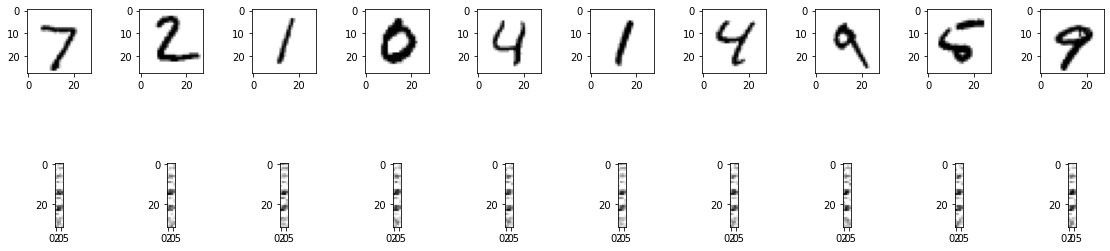

In [6]:
## encoder output
compressed_img = encoder.predict(x_test)
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display compressed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(compressed_img[i].reshape((4, 4 * 8)).T, cmap="binary")
plt.show()


# Decoder output 

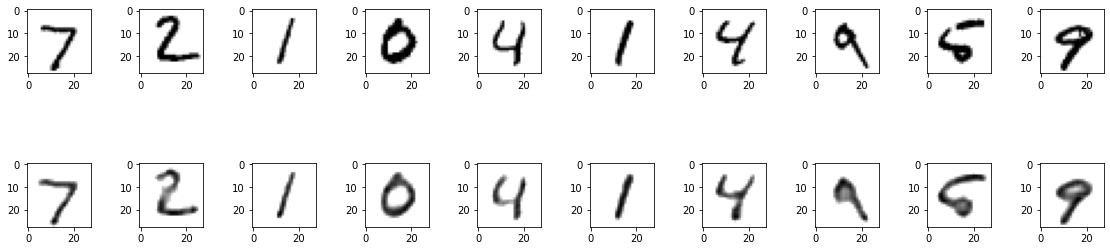

In [7]:
##decoder output
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(reconstructed_img[i].reshape(28, 28), cmap="binary")

plt.show()